### Import Libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns


from sklearn.metrics import silhouette_score
from sklearn.cluster import KMeans

import pickle

### 1. Open Typeform Data from Survey

In [2]:
df = pd.read_csv("../data/typeform_igb.csv")

df.head()

,#,¿En qué rango de edad te encuentras?,¿Cuántas personas sois en vuestro hogar?,¿En qué provincia vives? Vamos a conocernos un poco mejor 😄,¿De cuál de estos temas te interesaría saber más?,¿Cuánto duran tus duchas?,¿Cuántas veces pones la lavadora a la semana?,¿Cuántas veces pones el lavavajillas?,¿Sueles poner el modo *ECO *en tus electrodomésticos?,¿Reciclas agua para usarlo en otras tareas?,...,"cartón y plástico?""""",¿Cada cuánto consumes *carne*?,¿Cuántos km haces a la semana en coche?,¿Cuánto gastas al mes en comida para gato/perro?,¿Cuántos metros cuadrados tiene tu jardín?,¿Sabes cuánto dinero gastas en tu consumo de agua al mes?,Start Date (UTC),Submit Date (UTC),Network ID,Tags;
0,cb2hsyhk4q48anbuacl1cb2hspesvqca,Entre 36 y 65 años,4.0,Madrid,Ayudar al ecosistema,Entre 5 y 10 minutos,Entre 3 y 5 veces,Entre 3 y 5 a la semana,A veces,No,...,1 vez al día,Más de 200 km,No tengo mascota,0,Ni idea!,2023-05-18 05:55:47,2023-05-18 05:58:06,31494a64d0,;,NaN
1,1lvp0ymwpl878xcfgo1lvp0yhw1vy0ld,Entre 36 y 65 años,3.0,Segovia,Ayudar al ecosistema,Menos de 5 minutos,Menos de 3 veces,Entre 3 y 5 a la semana,Siempre,No,...,1 vez cada 3 días,Menos de 100 km,No tengo mascota,300,Ni idea!,2023-05-18 05:36:34,2023-05-18 05:38:17,26873d694b,;,NaN
2,t5e8kn9ug41t5zdgpgnt5e8kn9dx7xba,Entre 36 y 65 años,2.0,Segovia,Ahorrar dinero,Menos de 5 minutos,Menos de 3 veces,Friego a mano,No sabía que existía ese modo,No,...,1 vez a la semana,100 - 200 km,No tengo mascota,0,Ni idea!,2023-05-18 05:31:31,2023-05-18 05:33:35,6050316def,;,NaN
3,lhrk180jtc1swhx2plhrk18wntdhnix6,Entre 18 y 35 años,2.0,Segovia,Ahorrar agua,Entre 5 y 10 minutos,Menos de 3 veces,Friego a mano,Siempre,No,...,1 vez al día,Menos de 100 km,No tengo mascota,0,Ni idea!,2023-05-18 05:22:13,2023-05-18 05:23:42,903866689d,;,NaN
4,6mv5t8yarw67kj343annxsb6mv5t8yhx,Entre 36 y 65 años,2.0,Madrid,Ahorrar agua,Entre 5 y 10 minutos,Menos de 3 veces,Friego a mano,A veces,Si,...,1 vez cada 3 días,No uso coche,No tengo mascota,2,Entre 10€ y 40 €,2023-05-18 05:05:50,2023-05-18 05:08:08,1acecc257c,;,NaN


### Lets remove some unnecesary columns that disturb us

In [3]:
# Drop the first column and last two columns
df = df.drop(df.columns[0], axis=1)  
df = df.iloc[:, :-5] 

df.head()

,¿En qué rango de edad te encuentras?,¿Cuántas personas sois en vuestro hogar?,¿En qué provincia vives? Vamos a conocernos un poco mejor 😄,¿De cuál de estos temas te interesaría saber más?,¿Cuánto duran tus duchas?,¿Cuántas veces pones la lavadora a la semana?,¿Cuántas veces pones el lavavajillas?,¿Sueles poner el modo *ECO *en tus electrodomésticos?,¿Reciclas agua para usarlo en otras tareas?,¿*Reciclas *vidrio,"cartón y plástico?""""",¿Cada cuánto consumes *carne*?,¿Cuántos km haces a la semana en coche?,¿Cuánto gastas al mes en comida para gato/perro?,¿Cuántos metros cuadrados tiene tu jardín?
0,Entre 36 y 65 años,4.0,Madrid,Ayudar al ecosistema,Entre 5 y 10 minutos,Entre 3 y 5 veces,Entre 3 y 5 a la semana,A veces,No,Siempre,1 vez al día,Más de 200 km,No tengo mascota,0,Ni idea!
1,Entre 36 y 65 años,3.0,Segovia,Ayudar al ecosistema,Menos de 5 minutos,Menos de 3 veces,Entre 3 y 5 a la semana,Siempre,No,A veces,1 vez cada 3 días,Menos de 100 km,No tengo mascota,300,Ni idea!
2,Entre 36 y 65 años,2.0,Segovia,Ahorrar dinero,Menos de 5 minutos,Menos de 3 veces,Friego a mano,No sabía que existía ese modo,No,A veces,1 vez a la semana,100 - 200 km,No tengo mascota,0,Ni idea!
3,Entre 18 y 35 años,2.0,Segovia,Ahorrar agua,Entre 5 y 10 minutos,Menos de 3 veces,Friego a mano,Siempre,No,A veces,1 vez al día,Menos de 100 km,No tengo mascota,0,Ni idea!
4,Entre 36 y 65 años,2.0,Madrid,Ahorrar agua,Entre 5 y 10 minutos,Menos de 3 veces,Friego a mano,A veces,Si,Siempre,1 vez cada 3 días,No uso coche,No tengo mascota,2,Entre 10€ y 40 €


## 2. Exploratory Data Analysis

### Feature and Target Analysis

The dataset contains a list of Spanish residents behaviour of their personal water consumption.

**Features:**

1. Age: 4 groups of age
2. Residents: Number of people who live in a home.
3. Province: What part of Spain are you from.
4. Interests: Help Eco, save money, save water or know water footprint. 
5. Shower
6. Washing machine
7. Dishwasher
8. Eco Mode
9. Water recycling
10. General recycling
11. Meat Consumption
12. Gasoline
13. Pet: 3 pet food expenditures and 1 option stating that he has not any pet.
14. Garden area
15. Water estimation spent

**Targets:**

We do not now yet. 

* Expected groups:
    * 0: Water Saver 
    * 1: Water Spender
    * 2: Water unconscious

### Rename columns

In [4]:
list = [ "Age",
 "Residents",
 "Province",
 "Interests",
 "Shower",
 "WashingMachine",
 "DishWasher",
 "EcoMode",
 "WaterRecycling",
 "GeneralRecycling",
 "Meat",
 "Gasoline",
 "Pet",
"Garden",
 "Estimation"]

for index,name in enumerate(list):
    df.rename(columns={df.columns[index]: name}, inplace=True)

df.head()

,Age,Residents,Province,Interests,Shower,WashingMachine,DishWasher,EcoMode,WaterRecycling,GeneralRecycling,Meat,Gasoline,Pet,Garden,Estimation
0,Entre 36 y 65 años,4.0,Madrid,Ayudar al ecosistema,Entre 5 y 10 minutos,Entre 3 y 5 veces,Entre 3 y 5 a la semana,A veces,No,Siempre,1 vez al día,Más de 200 km,No tengo mascota,0,Ni idea!
1,Entre 36 y 65 años,3.0,Segovia,Ayudar al ecosistema,Menos de 5 minutos,Menos de 3 veces,Entre 3 y 5 a la semana,Siempre,No,A veces,1 vez cada 3 días,Menos de 100 km,No tengo mascota,300,Ni idea!
2,Entre 36 y 65 años,2.0,Segovia,Ahorrar dinero,Menos de 5 minutos,Menos de 3 veces,Friego a mano,No sabía que existía ese modo,No,A veces,1 vez a la semana,100 - 200 km,No tengo mascota,0,Ni idea!
3,Entre 18 y 35 años,2.0,Segovia,Ahorrar agua,Entre 5 y 10 minutos,Menos de 3 veces,Friego a mano,Siempre,No,A veces,1 vez al día,Menos de 100 km,No tengo mascota,0,Ni idea!
4,Entre 36 y 65 años,2.0,Madrid,Ahorrar agua,Entre 5 y 10 minutos,Menos de 3 veces,Friego a mano,A veces,Si,Siempre,1 vez cada 3 días,No uso coche,No tengo mascota,2,Entre 10€ y 40 €


### Paint some Data 👨🏻‍🎨

In [5]:
# PAIR PLOT

colors = [ '#ee6c4d', '#98c1d9', '#3d5a80', '#293241']
sns.set_palette(sns.color_palette(colors))

In [6]:
# def plot_graph (column):
#     print(df[column].value_counts(dropna= False))
#     plt.figure(figsize=(8, 5))
#     df[column].value_counts().sort_values(ascending=True).plot(kind='barh', ylabel= None, title= str(column))
#     plt.show()


# for i in list:
#     plot_graph(i)


#### Check and Handle NaN



In [7]:
# All columns are type object, except residents float64

# Check for any NaN in df
print("Original length of df: ",len(df))
df.isna().sum()

Original length of df:  1182


Age                  4
Residents            4
Province             3
Interests            3
Shower               3
WashingMachine       3
DishWasher           3
EcoMode              3
WaterRecycling       3
GeneralRecycling     3
Meat                 3
Gasoline             3
Pet                  3
Garden              65
Estimation           4
dtype: int64

In [8]:
df.head()

,Age,Residents,Province,Interests,Shower,WashingMachine,DishWasher,EcoMode,WaterRecycling,GeneralRecycling,Meat,Gasoline,Pet,Garden,Estimation
0,Entre 36 y 65 años,4.0,Madrid,Ayudar al ecosistema,Entre 5 y 10 minutos,Entre 3 y 5 veces,Entre 3 y 5 a la semana,A veces,No,Siempre,1 vez al día,Más de 200 km,No tengo mascota,0,Ni idea!
1,Entre 36 y 65 años,3.0,Segovia,Ayudar al ecosistema,Menos de 5 minutos,Menos de 3 veces,Entre 3 y 5 a la semana,Siempre,No,A veces,1 vez cada 3 días,Menos de 100 km,No tengo mascota,300,Ni idea!
2,Entre 36 y 65 años,2.0,Segovia,Ahorrar dinero,Menos de 5 minutos,Menos de 3 veces,Friego a mano,No sabía que existía ese modo,No,A veces,1 vez a la semana,100 - 200 km,No tengo mascota,0,Ni idea!
3,Entre 18 y 35 años,2.0,Segovia,Ahorrar agua,Entre 5 y 10 minutos,Menos de 3 veces,Friego a mano,Siempre,No,A veces,1 vez al día,Menos de 100 km,No tengo mascota,0,Ni idea!
4,Entre 36 y 65 años,2.0,Madrid,Ahorrar agua,Entre 5 y 10 minutos,Menos de 3 veces,Friego a mano,A veces,Si,Siempre,1 vez cada 3 días,No uso coche,No tengo mascota,2,Entre 10€ y 40 €


### Feature Engineering

In [9]:
# Pet: we are interested in knowing if they have or not.
df.loc[df["Pet"] == 'No tengo mascota', "Pet"] = "No"
df.loc[df["Pet"] != 'No', "Pet"] = "Yes"

### Car: we are interested in knowing if they use the car or not.
df.loc[df["Gasoline"] == 'No uso coche', "Gasoline"] = "No"
df.loc[df["Gasoline"] != 'No', "Gasoline"] = "Yes"

# Meat: we are interested in knowing if they are meat eaters or not.
df.loc[df["Meat"] == 'Nunca!', "Meat"] = "No"
df.loc[df["Meat"] == '1 vez a la semana', "Meat"] = "No"
df.loc[df["Meat"] != 'No', "Meat"] = "Yes"

# Estimation: we are interested in knowing if they are aware with their water expenditure or not.
df.loc[df["Estimation"] == 'Ni idea!', "Estimation"] = "No"
df.loc[df["Estimation"] != 'No', "Estimation"] = "Yes"

# WaterRecylcing: Include will try and yes => yes.
df.loc[df["WaterRecycling"] != 'No', "WaterRecycling"] = "Yes"


# Age: Yound and Old.
df.loc[df["Age"] == 'Entre 36 y 65 años', "Age"] = "Old"
df.loc[df["Age"] == 'Mayor de 65 años', "Age"] = "Old"
df.loc[df["Age"] != 'Old', "Age"] = "Young"



# Shower: 3 ranges.
df.loc[df["Shower"] == 'Menos de 5 minutos', "Shower"] = "Saver"
df.loc[df["Shower"] == 'Entre 5 y 10 minutos', "Shower"] = "Medium"
df.loc[df["Shower"] == 'Entre 11 y 15 minutos', "Shower"] = "Large"
df.loc[df["Shower"] == 'Más de 15 minutos', "Shower"] = "Large"



# Eliminar

df.drop(columns=["Residents","Province"], inplace=True)
 
# Provincias
# Residents



### Lets look into Garden column 🌷

In [10]:
#Primero necesitamos convertir la columna a str
df['Garden'] = df['Garden'].astype(str)

#Nos ayudamos de expresiones regulares
import re
def transformar_registro(registro):
    if registro.isdigit():
        return int(registro)
    else:
        numero_encontrado = re.search(r'\d+', registro)
        if numero_encontrado:
            return int(numero_encontrado.group())
        else:
            return 0
            
#hacemos la transformación correspondiente
df['Garden'] = df['Garden'].apply(transformar_registro)


In [11]:
df.head()

,Age,Interests,Shower,WashingMachine,DishWasher,EcoMode,WaterRecycling,GeneralRecycling,Meat,Gasoline,Pet,Garden,Estimation
0,Old,Ayudar al ecosistema,Medium,Entre 3 y 5 veces,Entre 3 y 5 a la semana,A veces,No,Siempre,Yes,Yes,No,0,No
1,Old,Ayudar al ecosistema,Saver,Menos de 3 veces,Entre 3 y 5 a la semana,Siempre,No,A veces,Yes,Yes,No,300,No
2,Old,Ahorrar dinero,Saver,Menos de 3 veces,Friego a mano,No sabía que existía ese modo,No,A veces,No,Yes,No,0,No
3,Young,Ahorrar agua,Medium,Menos de 3 veces,Friego a mano,Siempre,No,A veces,Yes,Yes,No,0,No
4,Old,Ahorrar agua,Medium,Menos de 3 veces,Friego a mano,A veces,Yes,Siempre,Yes,No,No,2,Yes


In [12]:
# Shower: 3 ranges.
df.loc[df["Garden"] == 0, "Garden"] = "No"
df.loc[df["Garden"] != "No", "Garden"] = "Yes"

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1182 entries, 0 to 1181
Data columns (total 13 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   Age               1182 non-null   object
 1   Interests         1179 non-null   object
 2   Shower            1179 non-null   object
 3   WashingMachine    1179 non-null   object
 4   DishWasher        1179 non-null   object
 5   EcoMode           1179 non-null   object
 6   WaterRecycling    1182 non-null   object
 7   GeneralRecycling  1179 non-null   object
 8   Meat              1182 non-null   object
 9   Gasoline          1182 non-null   object
 10  Pet               1182 non-null   object
 11  Garden            1182 non-null   object
 12  Estimation        1182 non-null   object
dtypes: object(13)
memory usage: 120.2+ KB


In [13]:
df.head()

,Age,Interests,Shower,WashingMachine,DishWasher,EcoMode,WaterRecycling,GeneralRecycling,Meat,Gasoline,Pet,Garden,Estimation
0,Old,Ayudar al ecosistema,Medium,Entre 3 y 5 veces,Entre 3 y 5 a la semana,A veces,No,Siempre,Yes,Yes,No,No,No
1,Old,Ayudar al ecosistema,Saver,Menos de 3 veces,Entre 3 y 5 a la semana,Siempre,No,A veces,Yes,Yes,No,Yes,No
2,Old,Ahorrar dinero,Saver,Menos de 3 veces,Friego a mano,No sabía que existía ese modo,No,A veces,No,Yes,No,No,No
3,Young,Ahorrar agua,Medium,Menos de 3 veces,Friego a mano,Siempre,No,A veces,Yes,Yes,No,No,No
4,Old,Ahorrar agua,Medium,Menos de 3 veces,Friego a mano,A veces,Yes,Siempre,Yes,No,No,Yes,Yes


In [14]:
# plot_graph("Garden")

In [15]:
# Check for any NaN in df
print("Original length of df: ",len(df))
df.isna().sum()

Original length of df:  1182


Age                 0
Interests           3
Shower              3
WashingMachine      3
DishWasher          3
EcoMode             3
WaterRecycling      0
GeneralRecycling    3
Meat                0
Gasoline            0
Pet                 0
Garden              0
Estimation          0
dtype: int64

In [16]:
# Save Garden results in Excel to view ALL of them
# values = df["Garden"]
# values.to_excel(r'./results/garden_clean.xlsx',sheet_name='train', index=False)

In [17]:
# Remove rows with NaN values
df = df.dropna()

print("Length with NaN removed: ",len(df))
# Check all are removed
df.isna().sum()

Length with NaN removed:  1179


Age                 0
Interests           0
Shower              0
WashingMachine      0
DishWasher          0
EcoMode             0
WaterRecycling      0
GeneralRecycling    0
Meat                0
Gasoline            0
Pet                 0
Garden              0
Estimation          0
dtype: int64

## Check All modified columns

In [18]:
# list_modified = [ "Age",
#  "Interests",
#  "Shower",
#  "WashingMachine",
#  "DishWasher",
#  "EcoMode",
#  "WaterRecycling",
#  "GeneralRecycling",
#  "Meat",
#  "Gasoline",
#  "Pet",
# "Garden",
#  "Estimation"]



# def plot_graph (column):
#     print(df[column].value_counts(dropna= False))
#     plt.figure(figsize=(8, 5))
#     df[column].value_counts().sort_values(ascending=True).plot(kind='barh', ylabel= None, title= str(column))
#     plt.show()


# for i in list_modified:
#     plot_graph(i)

---


# Machine Learning

In [19]:
df.head()

,Age,Interests,Shower,WashingMachine,DishWasher,EcoMode,WaterRecycling,GeneralRecycling,Meat,Gasoline,Pet,Garden,Estimation
0,Old,Ayudar al ecosistema,Medium,Entre 3 y 5 veces,Entre 3 y 5 a la semana,A veces,No,Siempre,Yes,Yes,No,No,No
1,Old,Ayudar al ecosistema,Saver,Menos de 3 veces,Entre 3 y 5 a la semana,Siempre,No,A veces,Yes,Yes,No,Yes,No
2,Old,Ahorrar dinero,Saver,Menos de 3 veces,Friego a mano,No sabía que existía ese modo,No,A veces,No,Yes,No,No,No
3,Young,Ahorrar agua,Medium,Menos de 3 veces,Friego a mano,Siempre,No,A veces,Yes,Yes,No,No,No
4,Old,Ahorrar agua,Medium,Menos de 3 veces,Friego a mano,A veces,Yes,Siempre,Yes,No,No,Yes,Yes


### Transmitting human intention (eco friendly) to Machine Learning model

In [20]:
# # ECO FRIENDLY => 0
# # MENOS ECO => 1
# # MENOS MENOS ECO => 2

# Gasoline
df.loc[df["Gasoline"] == "Yes", "Gasoline"] = 1
df.loc[df["Gasoline"] == "No", "Gasoline"] = 0

# Interests
df.loc[df["Interests"] == "Ayudar al ecosistema", "Interests"] = 0
df.loc[df["Interests"] == "Ahorrar agua", "Interests"] = 0
df.loc[df["Interests"] == "Conocer mi huella hídrica", "Interests"] = 1
df.loc[df["Interests"] == "Ahorrar dinero", "Interests"] = 2

# WaterRecycling
df.loc[df["WaterRecycling"] == "Yes", "WaterRecycling"] = 0
df.loc[df["WaterRecycling"] == "No", "WaterRecycling"] = 1

# Meat
df.loc[df["Meat"] == "No", "Meat"] = 0
df.loc[df["Meat"] == "Yes", "Meat"] = 1

# Shower
df.loc[df["Shower"] == "Saver", "Shower"] = 0
df.loc[df["Shower"] == "Medium", "Shower"] = 1
df.loc[df["Shower"] == "Large", "Shower"] = 2

# WashingMachine
df.loc[df["WashingMachine"] == "Menos de 3 veces", "WashingMachine"] = 0
df.loc[df["WashingMachine"] == "Entre 3 y 5 veces", "WashingMachine"] = 1
df.loc[df["WashingMachine"] == "Más de 5", "WashingMachine"] = 1

# DishWasher
df.loc[df["DishWasher"] == "1 vez al día", "DishWasher"] = 0
df.loc[df["DishWasher"] == "Entre 3 y 5 a la semana", "DishWasher"] = 1
df.loc[df["DishWasher"] == "Friego a mano", "DishWasher"] = 2

# EcoMode
df.loc[df["EcoMode"] == "Siempre", "EcoMode"] = 0
df.loc[df["EcoMode"] == "A veces", "EcoMode"] = 1
df.loc[df["EcoMode"] == "No sabía que existía ese modo", "EcoMode"] = 2

# GeneralRecycling
df.loc[df["GeneralRecycling"] == "Siempre", "GeneralRecycling"] = 0
df.loc[df["GeneralRecycling"] == "A veces", "GeneralRecycling"] = 1
df.loc[df["GeneralRecycling"] == "Nunca!", "GeneralRecycling"] = 1


### Hide

In [21]:
# # ECO FRIENDLY => 2
# # MENOS ECO => 3
# # MENOS MENOS ECO => 4

# # Gasoline
# df.loc[df["Gasoline"] == "Yes", "Gasoline"] = 3
# df.loc[df["Gasoline"] == "No", "Gasoline"] = 4

# # Interests
# df.loc[df["Interests"] == "Ayudar al ecosistema", "Interests"] = 2
# df.loc[df["Interests"] == "Ahorrar agua", "Interests"] = 2
# df.loc[df["Interests"] == "Conocer mi huella hídrica", "Interests"] = 3
# df.loc[df["Interests"] == "Ahorrar dinero", "Interests"] = 4

# # WaterRecycling
# df.loc[df["WaterRecycling"] == "Yes", "WaterRecycling"] = 2
# df.loc[df["WaterRecycling"] == "No", "WaterRecycling"] = 3

# # Meat
# df.loc[df["Meat"] == "No", "Meat"] = 2
# df.loc[df["Meat"] == "Yes", "Meat"] = 3

# # Shower
# df.loc[df["Shower"] == "Saver", "Shower"] = 2
# df.loc[df["Shower"] == "Medium", "Shower"] = 3
# df.loc[df["Shower"] == "Large", "Shower"] = 4

# # WashingMachine
# df.loc[df["WashingMachine"] == "Menos de 3 veces", "WashingMachine"] = 2
# df.loc[df["WashingMachine"] == "Entre 3 y 5 veces", "WashingMachine"] = 3
# df.loc[df["WashingMachine"] == "Más de 5", "WashingMachine"] = 4

# # DishWasher
# df.loc[df["DishWasher"] == "1 vez al día", "DishWasher"] = 2
# df.loc[df["DishWasher"] == "Entre 3 y 5 a la semana", "DishWasher"] = 3
# df.loc[df["DishWasher"] == "Friego a mano", "DishWasher"] = 4

# # EcoMode
# df.loc[df["EcoMode"] == "Siempre", "EcoMode"] = 2
# df.loc[df["EcoMode"] == "A veces", "EcoMode"] = 3
# df.loc[df["EcoMode"] == "No sabía que existía ese modo", "EcoMode"] = 4

# # GeneralRecycling
# df.loc[df["GeneralRecycling"] == "Siempre", "GeneralRecycling"] = 2
# df.loc[df["GeneralRecycling"] == "A veces", "GeneralRecycling"] = 3
# df.loc[df["GeneralRecycling"] == "Nunca!", "GeneralRecycling"] = 4

In [22]:
df = df.drop(columns= ['Garden', 'Meat', 'Pet'])

### One-hot encoding



In [23]:
df = pd.get_dummies(df, columns= ["Age","Estimation"])

df.head()

,Interests,Shower,WashingMachine,DishWasher,EcoMode,WaterRecycling,GeneralRecycling,Gasoline,Age_Old,Age_Young,Estimation_No,Estimation_Yes
0,0,1,1,1,1,1,0,1,1,0,1,0
1,0,0,0,1,0,1,1,1,1,0,1,0
2,2,0,0,2,2,1,1,1,1,0,1,0
3,0,1,0,2,0,1,1,1,0,1,1,0
4,0,1,0,2,1,0,0,0,1,0,0,1


### Transform column type for k-means

In [24]:
column_name = df.select_dtypes(include=['uint8',"object"]).columns
df[column_name] = df[column_name].astype('int64')

In [25]:
df_to_play = df
df

,Interests,Shower,WashingMachine,DishWasher,EcoMode,WaterRecycling,GeneralRecycling,Gasoline,Age_Old,Age_Young,Estimation_No,Estimation_Yes
0,0,1,1,1,1,1,0,1,1,0,1,0
1,0,0,0,1,0,1,1,1,1,0,1,0
2,2,0,0,2,2,1,1,1,1,0,1,0
3,0,1,0,2,0,1,1,1,0,1,1,0
4,0,1,0,2,1,0,0,0,1,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...
1177,2,0,1,1,2,1,1,1,1,0,0,1
1178,1,2,0,1,1,0,1,1,0,1,0,1
1179,2,1,1,2,1,1,0,1,0,1,0,1
1180,2,2,1,2,1,1,1,0,1,0,0,1


In [26]:
len(df.columns)

12

----

## Realizamos un PCA para reducir el número de componentes

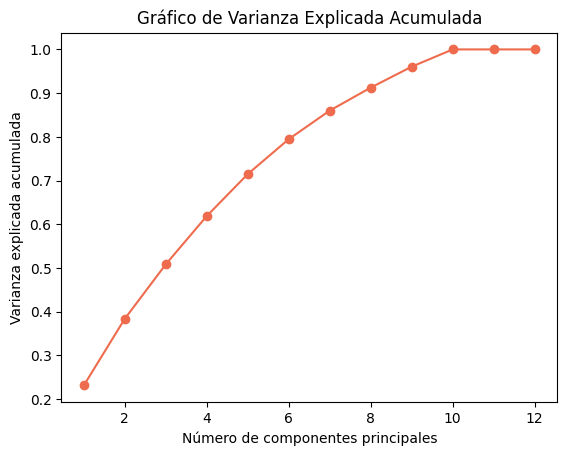

In [27]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA

# Realizar el PCA
pca = PCA()
pca.fit(df)

# Obtener la varianza explicada acumulada
variance_ratio_cumsum = np.cumsum(pca.explained_variance_ratio_)

# Graficar la varianza explicada acumulada
plt.plot(range(1, len(variance_ratio_cumsum) + 1), variance_ratio_cumsum, marker='o')
plt.xlabel('Número de componentes principales')
plt.ylabel('Varianza explicada acumulada')
plt.title('Gráfico de Varianza Explicada Acumulada')
plt.show()

In [28]:
#Aplicamos el PCA

pca = PCA(n_components = 6)
pca.fit(df)
X_pca = pca.transform(df)

---

## Realizamos el Kmeans

### Elbow Method : selección del número de clústers

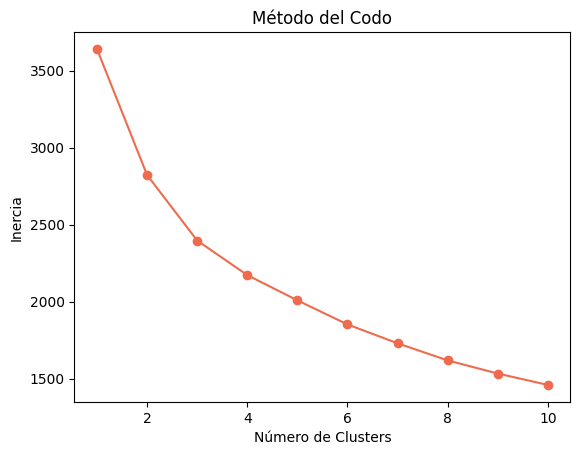

[ 3.38999397e-17 -8.94581742e-17 -8.64448462e-17 -4.78777794e-17
  1.22416449e-18 -6.53515504e-17]


In [29]:
# Realizar el bucle para encontrar el número óptimo de clusters usando el método del codo
inertias = []

for n_clusters in range(1, 11):
    kmeans = KMeans(n_clusters=n_clusters, n_init=10, random_state=42)
    kmeans.fit(X_pca)
    inertias.append(kmeans.inertia_)


# Graficar la curva del codo
plt.plot(range(1, 11), inertias, marker='o')
plt.xlabel('Número de Clusters')
plt.ylabel('Inercia')
plt.title('Método del Codo')
plt.show()

# Entrenar el modelo K-means con el número óptimo de clusters seleccionado por el método del codo
optimal_num_clusters = np.argmin(np.diff(inertias)) + 1
kmeans = KMeans(n_clusters=optimal_num_clusters, n_init=10, random_state=42)
kmeans.fit(X_pca)

# Obtener los centroides de los clusters
centroids = kmeans.cluster_centers_

# Imprimir los centroides
for centroid in centroids:
    print(centroid)

### Silhouette Score

The Silhouette Score is a metric used to evaluate the `quality` of clustering results. 
It provides a measure of how well each sample in a cluster is assigned to its own cluster compared to other clusters. 
The Silhouette Score can `range from -1 to 1`, where:

A score close to `+1` indicates that samples are `well-clustered`, with clear separation between clusters.

A score close to `0` indicates `overlapping clusters` or that samples are on or very close to the decision boundary between clusters.

A score close to `-1` indicates that samples may have been `assigned to the wrong clusters.`

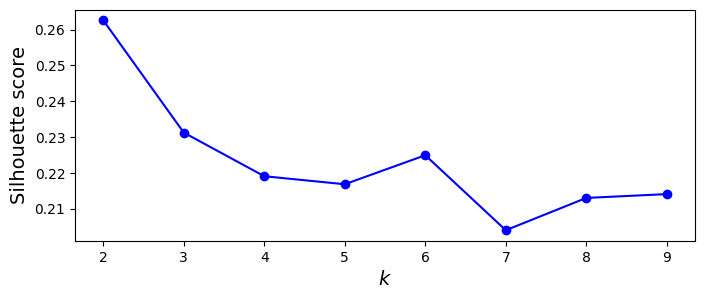

In [30]:

kmeans_per_k = [KMeans(n_clusters=k, n_init=10, random_state=42).fit(X_pca) for k in range(1,10)]

silhouette_scores = [silhouette_score(X_pca, model.labels_) for model in kmeans_per_k[1:]]

plt.figure(figsize=(8, 3))
plt.plot(range(2, 10), silhouette_scores, "bo-")
plt.xlabel("$k$", fontsize=14)
plt.ylabel("Silhouette score", fontsize=14)
plt.show()

In [31]:
kmeans.labels_

array([0, 0, 0, ..., 0, 0, 0])

<AxesSubplot:ylabel='Data'>

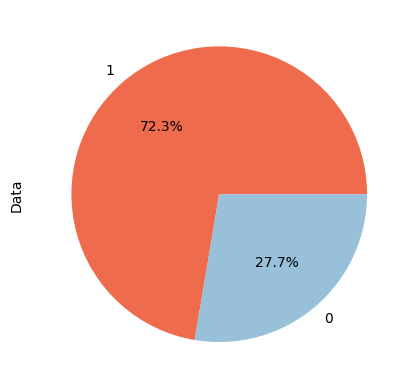

In [32]:
kmeans = KMeans(n_clusters = 2,n_init=10, random_state=42).fit(X_pca)

df = pd.DataFrame({"Data": kmeans.labels_})
df["Data"].value_counts().plot.pie(autopct="%.1f%%")

In [33]:
# The lesser the model inertia, the better the model fit.
kmeans.inertia_

# We can see that the model has very high inertia. So, this is not a good model fit to the data.

2822.7240571790057

In [34]:
label=kmeans.predict(X_pca)
print(f'Silhouette Score(n=2): {silhouette_score(X_pca, label)}')

Silhouette Score(n=2): 0.262635332229454


# Export model

In [ ]:
# Export the k-means model to a pickle file
with open('kmeans_model.pkl', 'wb') as f:
    pickle.dump(kmeans, f)

In [ ]:
# Read model
with open("kmeans_model.pkl", "rb") as archivo_entrada:
    pickle_kmeans = pickle.load(archivo_entrada)


In [ ]:
pickle_kmeans

KMeans(n_clusters=2, n_init=10, random_state=42)

In [ ]:
df_to_play

,Interests,Shower,WashingMachine,DishWasher,EcoMode,WaterRecycling,GeneralRecycling,Meat,Gasoline,Age_Old,Age_Young,Estimation_No,Estimation_Yes,Pet_No,Pet_Yes,Garden_No,Garden_Yes
0,0,1,1,1,1,1,0,1,1,True,False,True,False,True,False,True,False
1,0,0,0,1,0,1,1,1,1,True,False,True,False,True,False,False,True
2,2,0,0,2,2,1,1,0,1,True,False,True,False,True,False,True,False
3,0,1,0,2,0,1,1,1,1,False,True,True,False,True,False,True,False
4,0,1,0,2,1,0,0,1,0,True,False,False,True,True,False,False,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1178,1,2,0,1,1,0,1,1,1,False,True,False,True,False,True,True,False
1179,2,1,1,2,1,1,0,1,1,False,True,False,True,True,False,True,False
1180,2,2,1,2,1,1,1,1,0,True,False,False,True,True,False,True,False
1181,2,1,0,0,1,1,0,1,1,False,True,False,True,False,True,True,False


In [ ]:
# Extract the values of the row into a NumPy array and transform to 2D  
sample_survey_0 = df_to_play.iloc[100].values.reshape(1, -1)
sample_survey_1 = df_to_play.iloc[0].values.reshape(1, -1)

# Print the row values
print(sample_survey_0)
print(sample_survey_1)


# Set sample as df to prevent error?
sample_survey_df_0 = pd.DataFrame(sample_survey_0, columns=feature_names)
sample_survey_df_1 = pd.DataFrame(sample_survey_1, columns=feature_names)

# Give me a prediction of 0
print(pickle_kmeans.predict(sample_survey_df_0))
# Give me a prediction of 1
print(pickle_kmeans.predict(sample_survey_df_1))


[[2 1 0 0 0 0 0 1 0 False True True False False True True False]]
[[0 1 1 1 1 1 0 1 1 True False True False True False True False]]
[0]
[1]


In [ ]:
# TO BE CONTINUED ⬇️

## Select Random Row from Dataframe

In [ ]:
# Read the DataFrame 
df_random = pd.read_csv("../data/typeform_igb.csv")

# Get a random row from the DataFrame
new_survey = df_random.sample(n=1)

new_survey



,#,¿En qué rango de edad te encuentras?,¿Cuántas personas sois en vuestro hogar?,¿En qué provincia vives? Vamos a conocernos un poco mejor 😄,¿De cuál de estos temas te interesaría saber más?,¿Cuánto duran tus duchas?,¿Cuántas veces pones la lavadora a la semana?,¿Cuántas veces pones el lavavajillas?,¿Sueles poner el modo *ECO *en tus electrodomésticos?,¿Reciclas agua para usarlo en otras tareas?,...,"cartón y plástico?""""",¿Cada cuánto consumes *carne*?,¿Cuántos km haces a la semana en coche?,¿Cuánto gastas al mes en comida para gato/perro?,¿Cuántos metros cuadrados tiene tu jardín?,¿Sabes cuánto dinero gastas en tu consumo de agua al mes?,Start Date (UTC),Submit Date (UTC),Network ID,Tags;
372,63unkqa0xisol163uiw0rz9h54bqjyae,Entre 36 y 65 años,4.0,Cádiz,Ayudar al ecosistema,Entre 5 y 10 minutos,Entre 3 y 5 veces,Entre 3 y 5 a la semana,Siempre,Si,...,1 vez al día,Menos de 100 km,No tengo mascota,NaN,Más de 40 €,2023-05-17 07:58:31,2023-05-17 08:00:59,f9890b3a40,;,NaN


In [ ]:
# Create a dictionary to hold the preprocessing steps
preprocessing_steps = {
    'scaler': scaler,
    'encoder': encoder
}